## Import Necessary Modules

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [66]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.metrics import make_scorer, accuracy_score 

from xgboost import XGBClassifier

import warnings
warnings.filterwarnings('ignore')

## View Data

In [100]:
df1 = pd.read_csv('Surveydata_train.csv')
df2 = pd.read_csv('Traveldata_train.csv')
dft1 = pd.read_csv('Surveydata_test.csv')
dft2 = pd.read_csv('Traveldata_test.csv')

In [101]:
df_train = pd.merge(df1, df2, on='ID')
df_test = pd.merge(dft1, dft2, on='ID')

In [102]:
df_train.head()

,ID,Overall_Experience,Seat_comfort,Seat_Class,Arrival_time_convenient,Catering,Platform_location,Onboardwifi_service,Onboard_entertainment,Online_support,...,Cleanliness,Online_boarding,Gender,CustomerType,Age,TypeTravel,Travel_Class,Travel_Distance,DepartureDelay_in_Mins,ArrivalDelay_in_Mins
0,98800001,0,need improvement,Green Car,excellent,excellent,very convinient,good,need improvement,acceptable,...,need improvement,poor,Female,Loyal Customer,52.0,NaN,Business,272,0.0,5.0
1,98800002,0,poor,Ordinary,excellent,poor,need improvement,good,poor,good,...,good,good,Male,Loyal Customer,48.0,Personal Travel,Eco,2200,9.0,0.0
2,98800003,1,need improvement,Green Car,need improvement,need improvement,need improvement,need improvement,good,excellent,...,excellent,excellent,Female,Loyal Customer,43.0,Business travel,Business,1061,77.0,119.0
3,98800004,0,acceptable,Ordinary,need improvement,NaN,need improvement,acceptable,need improvement,acceptable,...,acceptable,acceptable,Female,Loyal Customer,44.0,Business travel,Business,780,13.0,18.0
4,98800005,1,acceptable,Ordinary,acceptable,acceptable,manageable,need improvement,good,excellent,...,good,good,Female,Loyal Customer,50.0,Business travel,Business,1981,0.0,0.0


In [103]:
df_test.head()

,ID,Seat_comfort,Seat_Class,Arrival_time_convenient,Catering,Platform_location,Onboardwifi_service,Onboard_entertainment,Online_support,Onlinebooking_Ease,...,Cleanliness,Online_boarding,Gender,CustomerType,Age,TypeTravel,Travel_Class,Travel_Distance,DepartureDelay_in_Mins,ArrivalDelay_in_Mins
0,99900001,acceptable,Green Car,acceptable,acceptable,manageable,need improvement,excellent,good,excellent,...,excellent,poor,Female,NaN,36.0,Business travel,Business,532,0.0,0.0
1,99900002,extremely poor,Ordinary,good,poor,manageable,acceptable,poor,acceptable,acceptable,...,excellent,acceptable,Female,disloyal Customer,21.0,Business travel,Business,1425,9.0,28.0
2,99900003,excellent,Ordinary,excellent,excellent,very convinient,excellent,excellent,excellent,need improvement,...,need improvement,excellent,Male,Loyal Customer,60.0,Business travel,Business,2832,0.0,0.0
3,99900004,acceptable,Green Car,excellent,acceptable,very convinient,poor,acceptable,excellent,poor,...,excellent,poor,Female,Loyal Customer,29.0,Personal Travel,Eco,1352,0.0,0.0
4,99900005,excellent,Ordinary,extremely poor,excellent,need improvement,excellent,excellent,excellent,excellent,...,excellent,excellent,Male,disloyal Customer,18.0,Business travel,Business,1610,17.0,0.0


## Check datatypes, missing values

In [104]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 94379 entries, 0 to 94378
Data columns (total 25 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ID                       94379 non-null  int64  
 1   Overall_Experience       94379 non-null  int64  
 2   Seat_comfort             94318 non-null  object 
 3   Seat_Class               94379 non-null  object 
 4   Arrival_time_convenient  85449 non-null  object 
 5   Catering                 85638 non-null  object 
 6   Platform_location        94349 non-null  object 
 7   Onboardwifi_service      94349 non-null  object 
 8   Onboard_entertainment    94361 non-null  object 
 9   Online_support           94288 non-null  object 
 10  Onlinebooking_Ease       94306 non-null  object 
 11  Onboard_service          86778 non-null  object 
 12  Leg_room                 94289 non-null  object 
 13  Baggage_handling         94237 non-null  object 
 14  Checkin_service       

Well clearly, some of the columns have less than 94379 entries, so we have some missing values. Let's see which ones.

In [105]:
df_train.columns[df_train.isnull().any()]

Index(['Seat_comfort', 'Arrival_time_convenient', 'Catering',
       'Platform_location', 'Onboardwifi_service', 'Onboard_entertainment',
       'Online_support', 'Onlinebooking_Ease', 'Onboard_service', 'Leg_room',
       'Baggage_handling', 'Checkin_service', 'Cleanliness', 'Online_boarding',
       'Gender', 'CustomerType', 'Age', 'TypeTravel', 'DepartureDelay_in_Mins',
       'ArrivalDelay_in_Mins'],
      dtype='object')

ID column is useless. Let's drop it.

In [106]:
ID_LIST = df_test['ID']

df_train = df_train.drop('ID', axis=1)
df_test = df_test.drop('ID', axis=1)
df_train.head()

,Overall_Experience,Seat_comfort,Seat_Class,Arrival_time_convenient,Catering,Platform_location,Onboardwifi_service,Onboard_entertainment,Online_support,Onlinebooking_Ease,...,Cleanliness,Online_boarding,Gender,CustomerType,Age,TypeTravel,Travel_Class,Travel_Distance,DepartureDelay_in_Mins,ArrivalDelay_in_Mins
0,0,need improvement,Green Car,excellent,excellent,very convinient,good,need improvement,acceptable,need improvement,...,need improvement,poor,Female,Loyal Customer,52.0,NaN,Business,272,0.0,5.0
1,0,poor,Ordinary,excellent,poor,need improvement,good,poor,good,good,...,good,good,Male,Loyal Customer,48.0,Personal Travel,Eco,2200,9.0,0.0
2,1,need improvement,Green Car,need improvement,need improvement,need improvement,need improvement,good,excellent,excellent,...,excellent,excellent,Female,Loyal Customer,43.0,Business travel,Business,1061,77.0,119.0
3,0,acceptable,Ordinary,need improvement,NaN,need improvement,acceptable,need improvement,acceptable,acceptable,...,acceptable,acceptable,Female,Loyal Customer,44.0,Business travel,Business,780,13.0,18.0
4,1,acceptable,Ordinary,acceptable,acceptable,manageable,need improvement,good,excellent,good,...,good,good,Female,Loyal Customer,50.0,Business travel,Business,1981,0.0,0.0


Also let's get an idea of how many people gave 1 and 0 responses to Overall Experience.

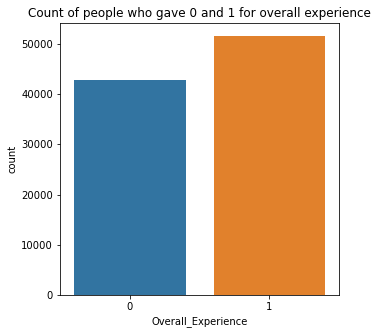

In [10]:
plt.figure(figsize=(5, 5))
sns.countplot(data=df_train, x='Overall_Experience')
plt.title('Count of people who gave 0 and 1 for overall experience');

So more people had a positive overall experience than a negative one.

## Numerical Features

Let's get the numerical features, and clean them.

In [11]:
df_numerical = df_train.select_dtypes(include=['int64', 'float64'])
df_test_numerical = df_test.select_dtypes(include=['int64', 'float64'])

df_numerical.head()

,Overall_Experience,Age,Travel_Distance,DepartureDelay_in_Mins,ArrivalDelay_in_Mins
0,0,52.0,272,0.0,5.0
1,0,48.0,2200,9.0,0.0
2,1,43.0,1061,77.0,119.0
3,0,44.0,780,13.0,18.0
4,1,50.0,1981,0.0,0.0


In [12]:
df_numerical.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 94379 entries, 0 to 94378
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Overall_Experience      94379 non-null  int64  
 1   Age                     94346 non-null  float64
 2   Travel_Distance         94379 non-null  int64  
 3   DepartureDelay_in_Mins  94322 non-null  float64
 4   ArrivalDelay_in_Mins    94022 non-null  float64
dtypes: float64(3), int64(2)
memory usage: 6.3 MB


So most of the data is intact. Let's get the distributions of the columns.

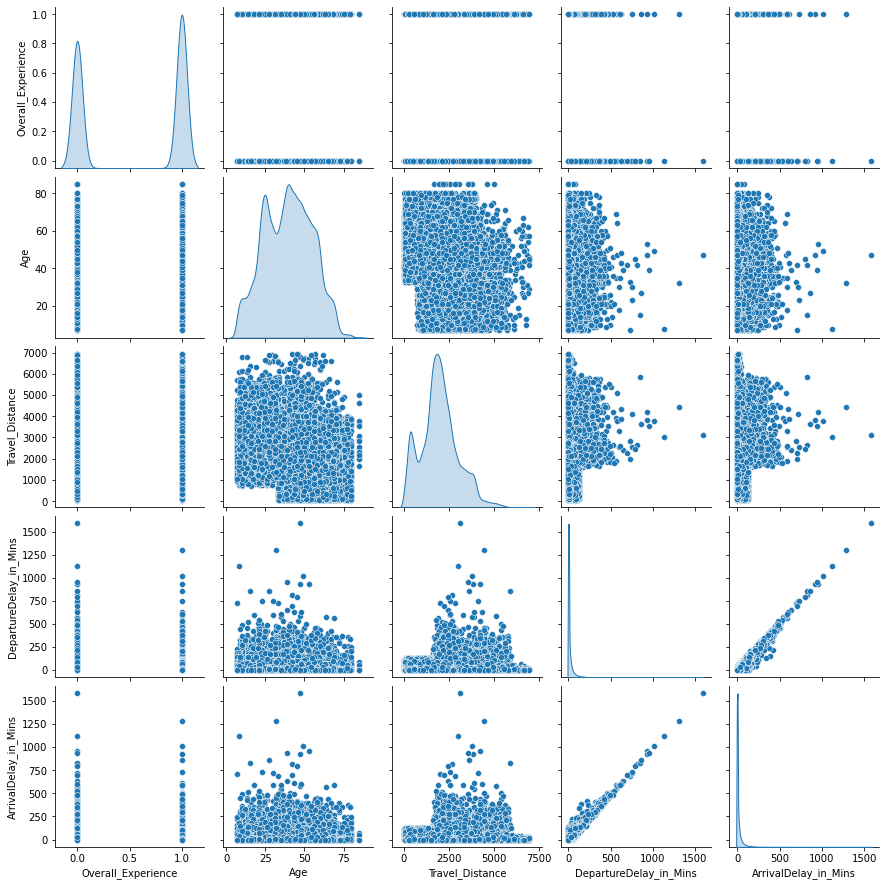

In [13]:
sns.pairplot(df_numerical, kind='scatter', diag_kind='kde')

Departure delay and arrival delay both have a massive spike at 0, which is expected as trains aren't supposed to be delayed. The departure delay and arrival delay are very highly correlated, while the other variables don't seem to be correlated at all.

In particular, none of these variables seem to be highly correlated with Overall Experience on their own.

Let's check the correlation between different variables and plot it on a heatmap.

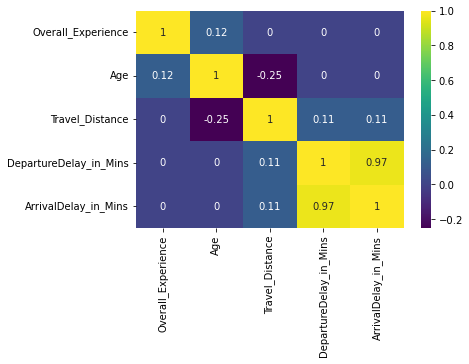

In [14]:
corr_numerical = df_numerical.corr()
corr_numerical[(corr_numerical < 0.1) & (corr_numerical > -0.1)] = 0
sns.heatmap(corr_numerical, cmap='viridis', annot=True);

Alright, the two columns have a correlation of 0.97. Let's drop one of them.

In [15]:
df_numerical = df_numerical.drop('ArrivalDelay_in_Mins', axis=1)
df_test_numerical = df_test_numerical.drop('ArrivalDelay_in_Mins', axis=1)

In [16]:
df_numerical.head()

,Overall_Experience,Age,Travel_Distance,DepartureDelay_in_Mins
0,0,52.0,272,0.0
1,0,48.0,2200,9.0
2,1,43.0,1061,77.0
3,0,44.0,780,13.0
4,1,50.0,1981,0.0


### Missing Values - Numerical

Let's replace missing values with the median. We use the median because it doesn't get affected by outliers.

In [17]:
imp = SimpleImputer(strategy='median')
df_numerical_imputed = pd.DataFrame(imp.fit_transform(df_numerical))
df_numerical_imputed.columns = df_numerical.columns

df_test_numerical_imputed = pd.DataFrame(imp.fit_transform(df_test_numerical))
df_test_numerical_imputed.columns = df_test_numerical.columns

df_numerical_imputed.head()

,Overall_Experience,Age,Travel_Distance,DepartureDelay_in_Mins
0,0.0,52.0,272.0,0.0
1,0.0,48.0,2200.0,9.0
2,1.0,43.0,1061.0,77.0
3,0.0,44.0,780.0,13.0
4,1.0,50.0,1981.0,0.0


Since there are so few missing values, imputing the median shouldn't really change the distribution that much. Let's see it in the plots below.

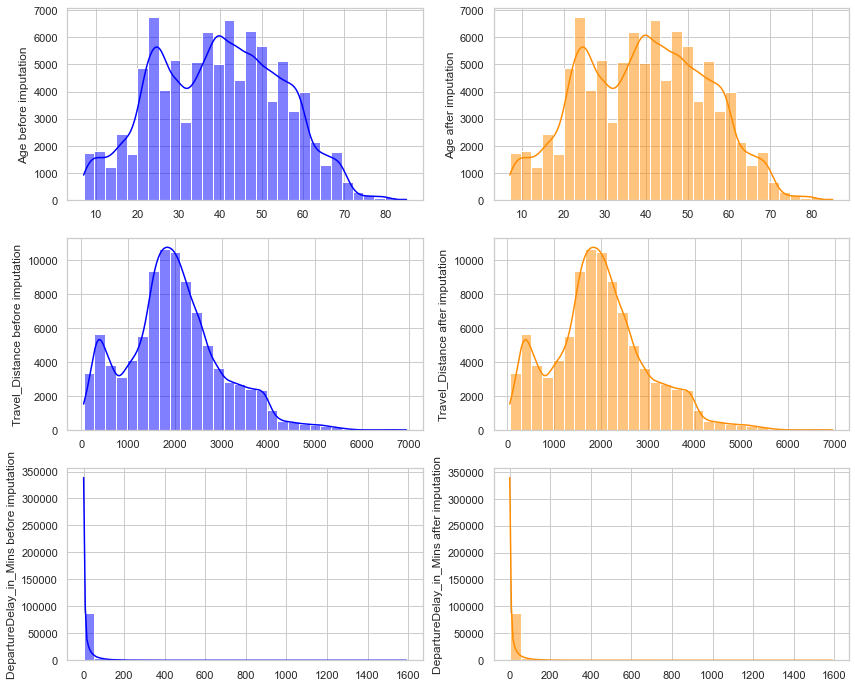

In [18]:
# Define figure parameters
sns.set(rc={"figure.figsize": (14, 12)})
sns.set_style("whitegrid")
fig, ax = plt.subplots(3, 2)

for feature, pos in zip(df_numerical_imputed.columns[1:], [0, 1, 2]):
    p = sns.histplot(ax=ax[pos, 0], x=df_numerical[feature], color='blue', bins=30, kde=True)
    p.set_xlabel('')
    p.set_ylabel(f'{feature} before imputation')
    q = sns.histplot(ax=ax[pos, 1], x=df_numerical_imputed[feature], color='darkorange', bins=30, kde=True)
    q.set_xlabel('')
    q.set_ylabel(f'{feature} after imputation')

So yeah, the distributions barely changed. So our imputation was successful and we can use `df_numerical_imputed` later.

## Categorical Columns

In [19]:
df_categ = df_train.select_dtypes(include=['object'])
df_test_categ = df_test.select_dtypes(include=['object'])
df_categ.head()

,Seat_comfort,Seat_Class,Arrival_time_convenient,Catering,Platform_location,Onboardwifi_service,Onboard_entertainment,Online_support,Onlinebooking_Ease,Onboard_service,Leg_room,Baggage_handling,Checkin_service,Cleanliness,Online_boarding,Gender,CustomerType,TypeTravel,Travel_Class
0,need improvement,Green Car,excellent,excellent,very convinient,good,need improvement,acceptable,need improvement,need improvement,acceptable,need improvement,good,need improvement,poor,Female,Loyal Customer,NaN,Business
1,poor,Ordinary,excellent,poor,need improvement,good,poor,good,good,excellent,need improvement,poor,need improvement,good,good,Male,Loyal Customer,Personal Travel,Eco
2,need improvement,Green Car,need improvement,need improvement,need improvement,need improvement,good,excellent,excellent,excellent,excellent,excellent,good,excellent,excellent,Female,Loyal Customer,Business travel,Business
3,acceptable,Ordinary,need improvement,NaN,need improvement,acceptable,need improvement,acceptable,acceptable,acceptable,acceptable,acceptable,good,acceptable,acceptable,Female,Loyal Customer,Business travel,Business
4,acceptable,Ordinary,acceptable,acceptable,manageable,need improvement,good,excellent,good,good,good,good,good,good,good,Female,Loyal Customer,Business travel,Business


Looks like we have a lot of categorical columns! Let's quickly check NaN values.

In [20]:
df_categ.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 94379 entries, 0 to 94378
Data columns (total 19 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Seat_comfort             94318 non-null  object
 1   Seat_Class               94379 non-null  object
 2   Arrival_time_convenient  85449 non-null  object
 3   Catering                 85638 non-null  object
 4   Platform_location        94349 non-null  object
 5   Onboardwifi_service      94349 non-null  object
 6   Onboard_entertainment    94361 non-null  object
 7   Online_support           94288 non-null  object
 8   Onlinebooking_Ease       94306 non-null  object
 9   Onboard_service          86778 non-null  object
 10  Leg_room                 94289 non-null  object
 11  Baggage_handling         94237 non-null  object
 12  Checkin_service          94302 non-null  object
 13  Cleanliness              94373 non-null  object
 14  Online_boarding          94373 non-nul

And let's visualize these 19 categorical columns with countplots.

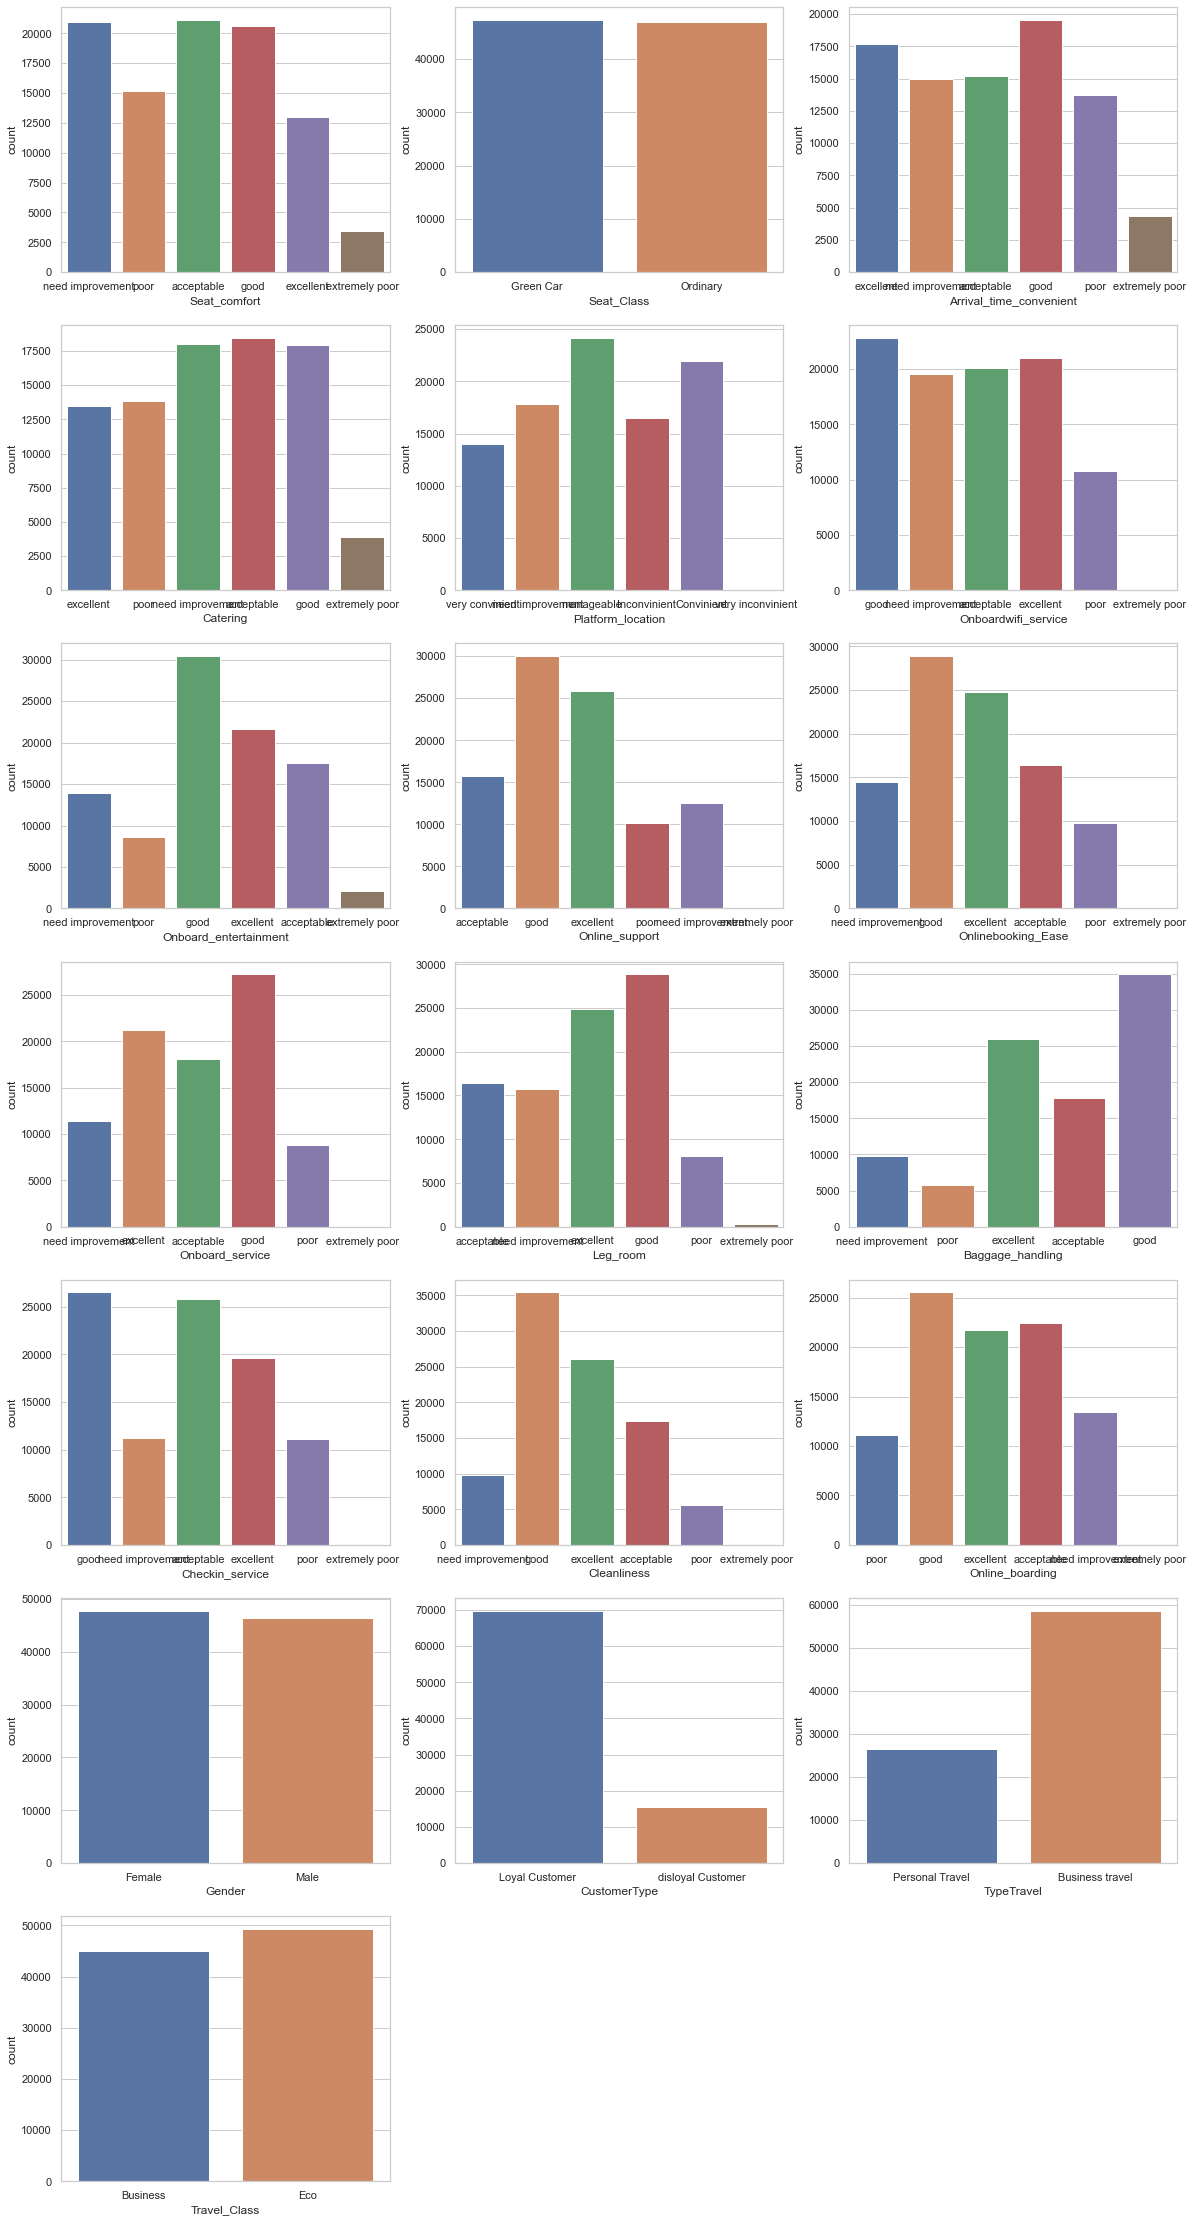

In [21]:
fig, ax = plt.subplots(7, 3, figsize=(20, 40))
for i in range(19):
    col = df_categ.columns[i]
    sns.countplot(ax=ax[i//3, i%3], x=df_categ[col])
    
fig.delaxes(ax[6][1])
fig.delaxes(ax[6][2])

Nothing much of interest here.

Let's see how each of the categorical variables affect Overall Experience individually.

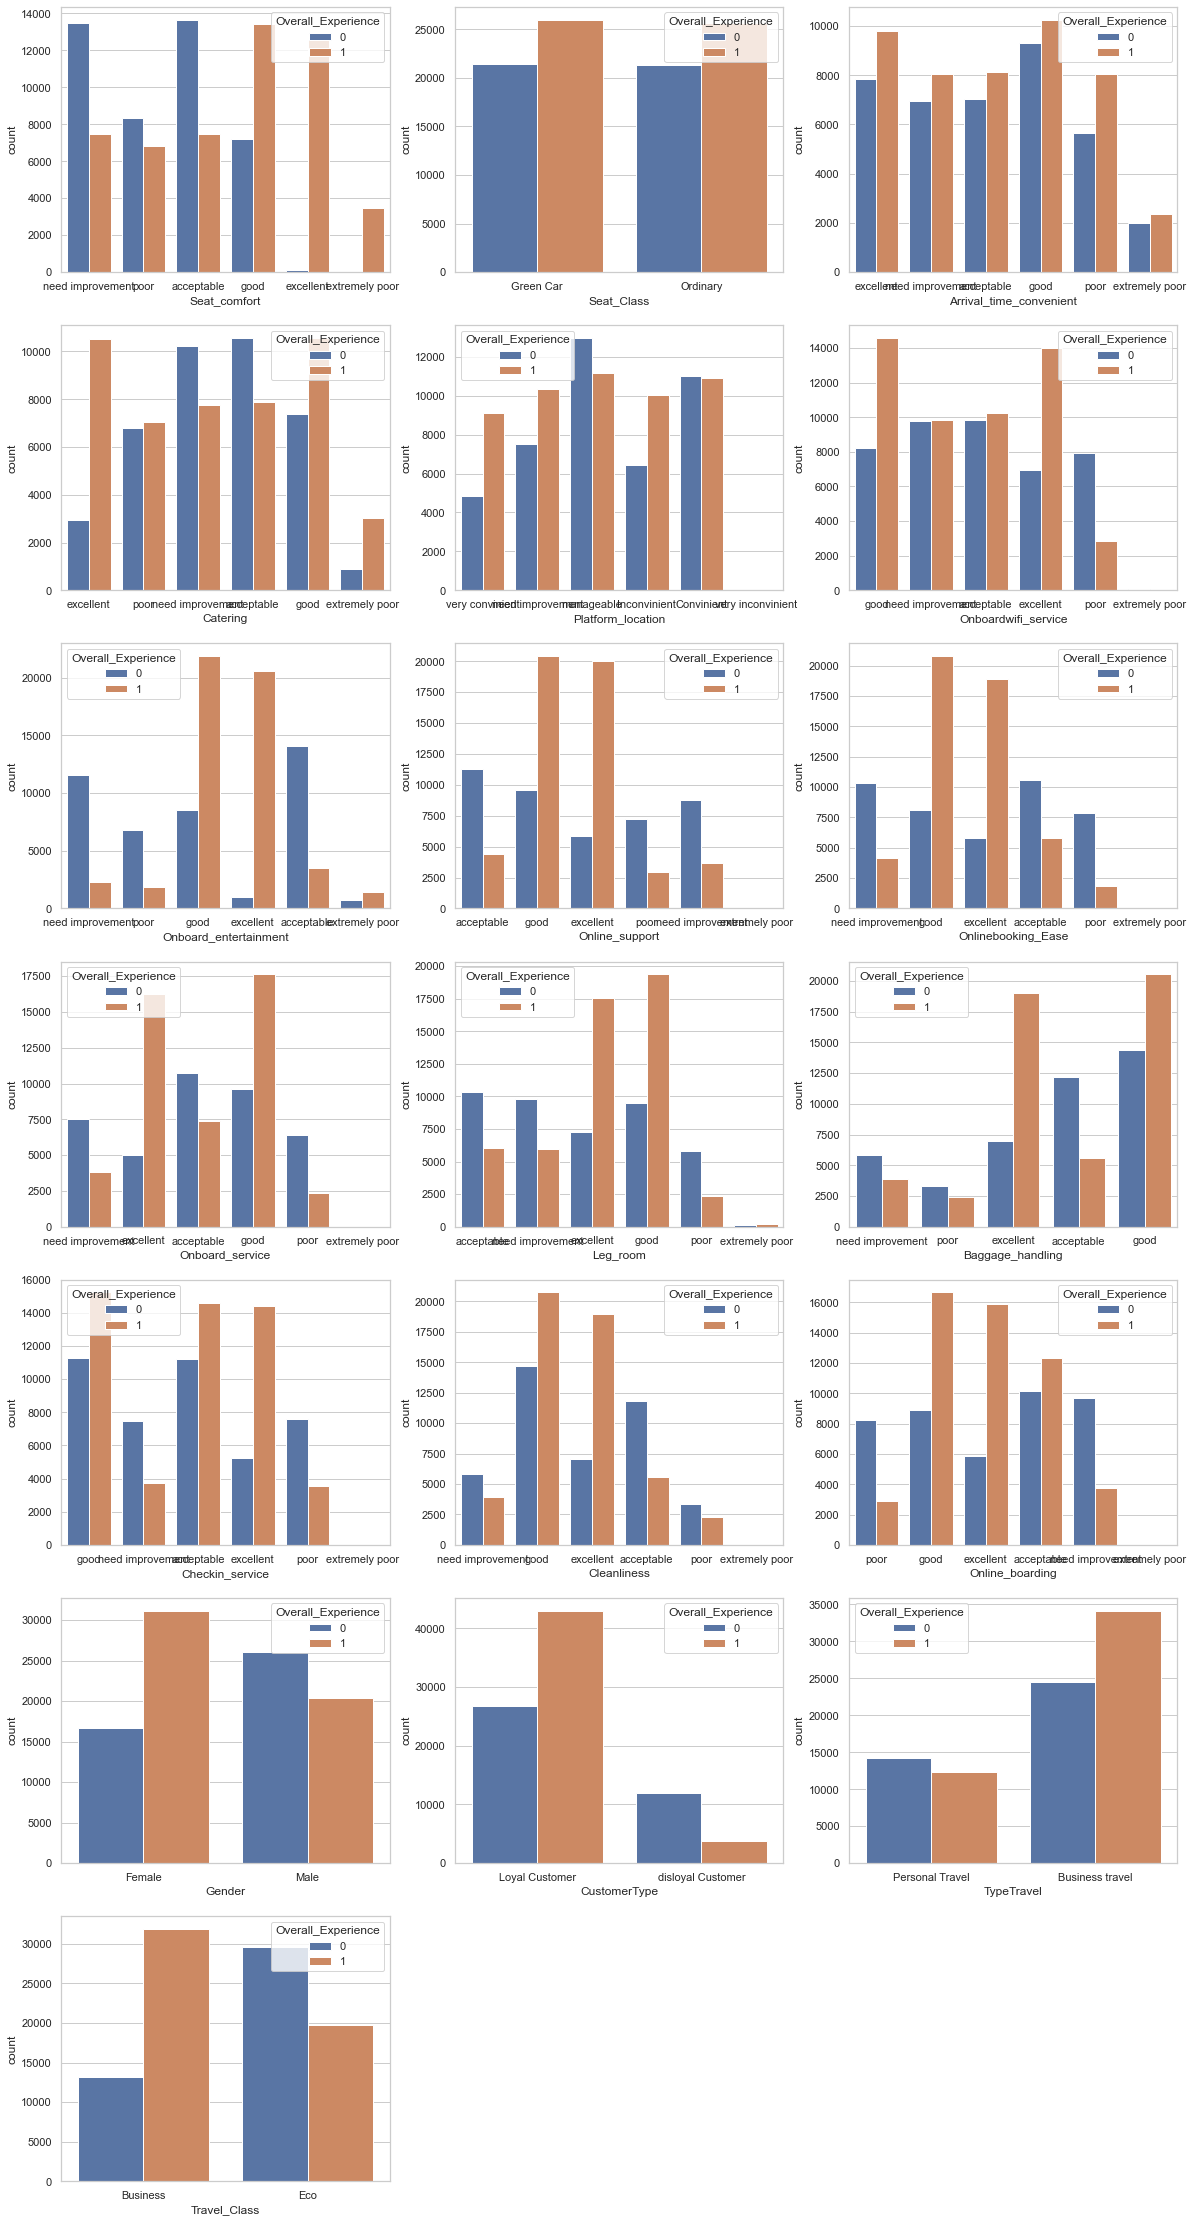

In [22]:
fig, ax = plt.subplots(7, 3, figsize=(20, 40))
for i in range(19):
    col = df_categ.columns[i]
    sns.countplot(ax=ax[i//3, i%3], data=df_train, x=col, hue='Overall_Experience')
    
fig.delaxes(ax[6][1])
fig.delaxes(ax[6][2])

### Missing Values - Categorical

Alright, we seem to have a lot more NaN values than before. But what percentage of each column is NaNs?

In [23]:
categ_null = df_categ.isnull().sum()
categ_null_prop = round(categ_null/94379, 4)
categ_null_prop

Seat_comfort               0.0006
Seat_Class                 0.0000
Arrival_time_convenient    0.0946
Catering                   0.0926
Platform_location          0.0003
Onboardwifi_service        0.0003
Onboard_entertainment      0.0002
Online_support             0.0010
Onlinebooking_Ease         0.0008
Onboard_service            0.0805
Leg_room                   0.0010
Baggage_handling           0.0015
Checkin_service            0.0008
Cleanliness                0.0001
Online_boarding            0.0001
Gender                     0.0008
CustomerType               0.0948
TypeTravel                 0.0978
Travel_Class               0.0000
dtype: float64

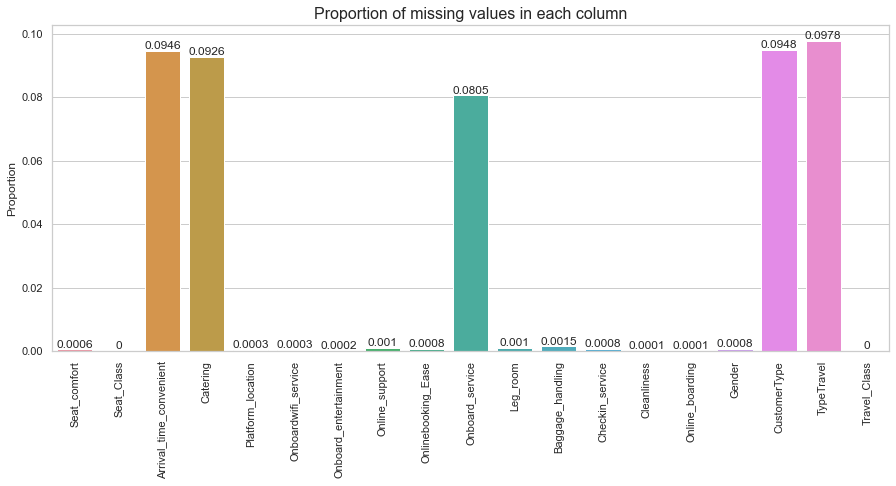

In [24]:
plt.figure(figsize=(15, 6))
ax = sns.barplot(x=df_categ.columns, y=categ_null_prop)
ax.bar_label(ax.containers[0])
plt.xticks(rotation=90)
plt.ylabel('Proportion')
plt.title('Proportion of missing values in each column',fontsize=16);

Some of the columns have significantly more missing data than others, but all of the columns have less than 10% missing data. So it's probably safe to impute the missing values rather than drop them altogether.

In [25]:
imp_c = SimpleImputer(strategy='most_frequent')
df_categ_imputed = pd.DataFrame(imp_c.fit_transform(df_categ))
df_categ_imputed.columns = df_categ.columns

df_test_categ_imputed = pd.DataFrame(imp_c.fit_transform(df_test_categ))
df_test_categ_imputed.columns = df_test_categ.columns

df_categ_imputed.head()

,Seat_comfort,Seat_Class,Arrival_time_convenient,Catering,Platform_location,Onboardwifi_service,Onboard_entertainment,Online_support,Onlinebooking_Ease,Onboard_service,Leg_room,Baggage_handling,Checkin_service,Cleanliness,Online_boarding,Gender,CustomerType,TypeTravel,Travel_Class
0,need improvement,Green Car,excellent,excellent,very convinient,good,need improvement,acceptable,need improvement,need improvement,acceptable,need improvement,good,need improvement,poor,Female,Loyal Customer,Business travel,Business
1,poor,Ordinary,excellent,poor,need improvement,good,poor,good,good,excellent,need improvement,poor,need improvement,good,good,Male,Loyal Customer,Personal Travel,Eco
2,need improvement,Green Car,need improvement,need improvement,need improvement,need improvement,good,excellent,excellent,excellent,excellent,excellent,good,excellent,excellent,Female,Loyal Customer,Business travel,Business
3,acceptable,Ordinary,need improvement,acceptable,need improvement,acceptable,need improvement,acceptable,acceptable,acceptable,acceptable,acceptable,good,acceptable,acceptable,Female,Loyal Customer,Business travel,Business
4,acceptable,Ordinary,acceptable,acceptable,manageable,need improvement,good,excellent,good,good,good,good,good,good,good,Female,Loyal Customer,Business travel,Business


Again, let's see the change in distribution when the values are imputed.

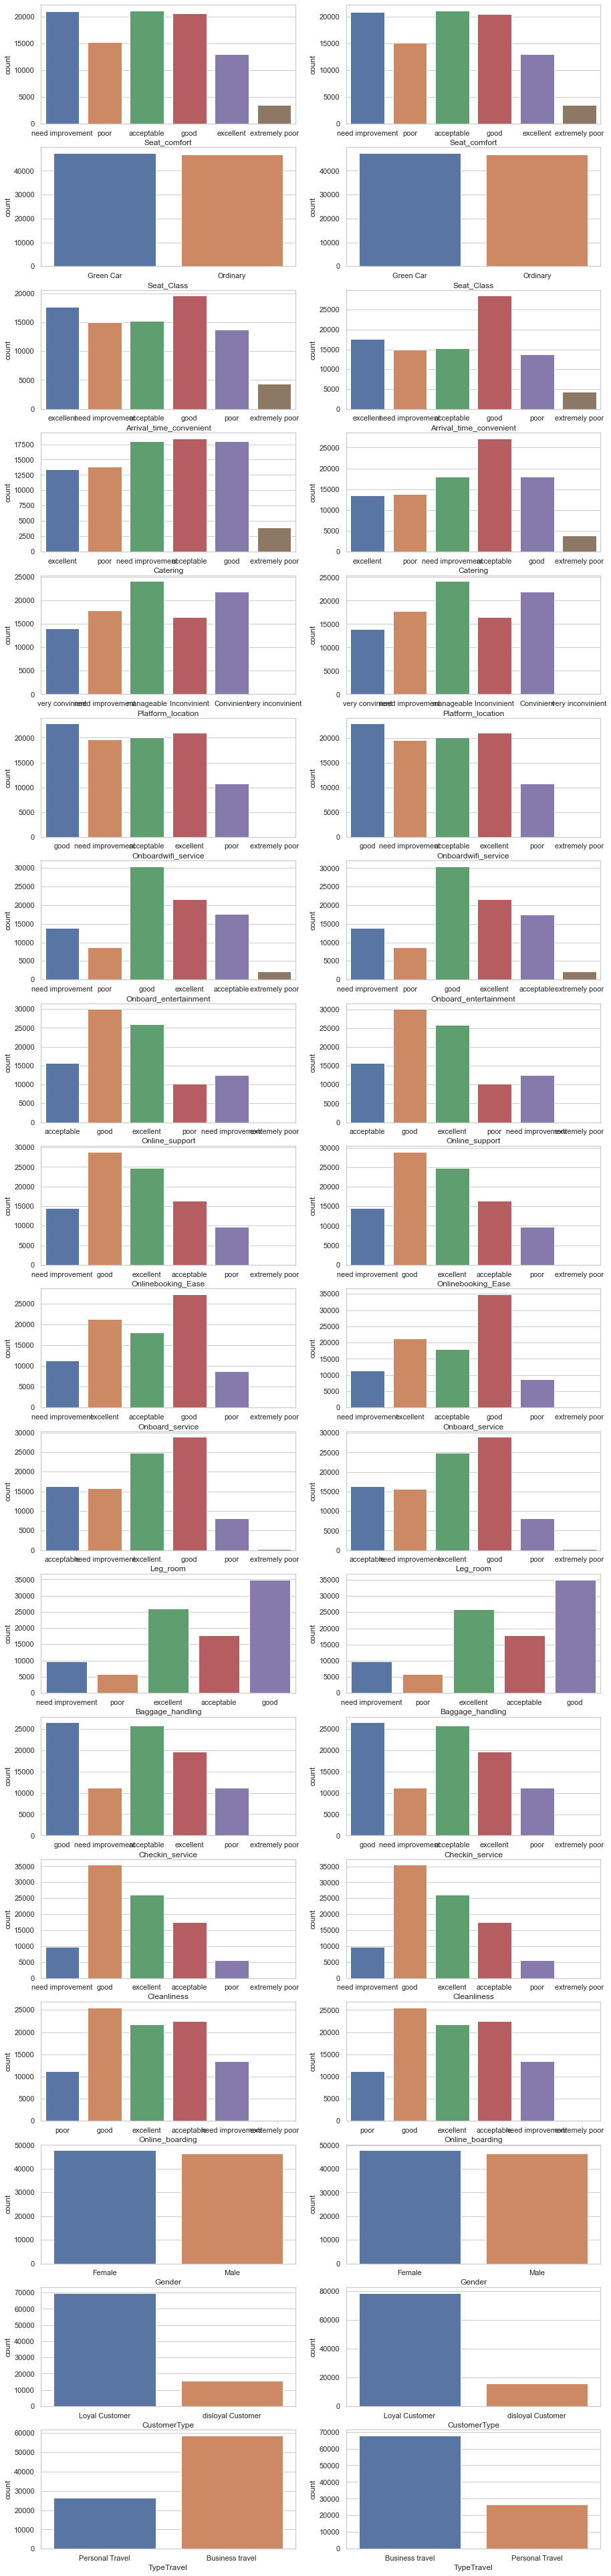

In [26]:
fig, ax = plt.subplots(18, 2, figsize=(15, 70))

for feature, pos in zip(df_categ.columns, range(18)):
    p = sns.countplot(ax=ax[pos, 0], x=df_categ[feature])
    q = sns.countplot(ax=ax[pos, 1], x=df_categ_imputed[feature])

The distribution of some of the columns did indeed change, e.g. Arrival_time_convenient and Catering. But they didn't change that much which is good. We will not drop any columns at this stage.

## One-hot Encoding

In [27]:
df_categ_imputed_dummies = pd.get_dummies(df_categ_imputed)
df_test_categ_imputed_dummies = pd.get_dummies(df_test_categ_imputed)

df_categ_imputed_dummies.head()

,Seat_comfort_acceptable,Seat_comfort_excellent,Seat_comfort_extremely poor,Seat_comfort_good,Seat_comfort_need improvement,Seat_comfort_poor,Seat_Class_Green Car,Seat_Class_Ordinary,Arrival_time_convenient_acceptable,Arrival_time_convenient_excellent,...,Online_boarding_need improvement,Online_boarding_poor,Gender_Female,Gender_Male,CustomerType_Loyal Customer,CustomerType_disloyal Customer,TypeTravel_Business travel,TypeTravel_Personal Travel,Travel_Class_Business,Travel_Class_Eco
0,0,0,0,0,1,0,1,0,0,1,...,0,1,1,0,1,0,1,0,1,0
1,0,0,0,0,0,1,0,1,0,1,...,0,0,0,1,1,0,0,1,0,1
2,0,0,0,0,1,0,1,0,0,0,...,0,0,1,0,1,0,1,0,1,0
3,1,0,0,0,0,0,0,1,0,0,...,0,0,1,0,1,0,1,0,1,0
4,1,0,0,0,0,0,0,1,1,0,...,0,0,1,0,1,0,1,0,1,0


## Merging

In [28]:
df_train_final = pd.merge(df_numerical_imputed, df_categ_imputed_dummies, left_index=True, right_index=True)
df_test_final = pd.merge(df_test_numerical_imputed, df_test_categ_imputed_dummies, left_index=True, right_index=True)

df_train_final.head()

,Overall_Experience,Age,Travel_Distance,DepartureDelay_in_Mins,Seat_comfort_acceptable,Seat_comfort_excellent,Seat_comfort_extremely poor,Seat_comfort_good,Seat_comfort_need improvement,Seat_comfort_poor,...,Online_boarding_need improvement,Online_boarding_poor,Gender_Female,Gender_Male,CustomerType_Loyal Customer,CustomerType_disloyal Customer,TypeTravel_Business travel,TypeTravel_Personal Travel,Travel_Class_Business,Travel_Class_Eco
0,0.0,52.0,272.0,0.0,0,0,0,0,1,0,...,0,1,1,0,1,0,1,0,1,0
1,0.0,48.0,2200.0,9.0,0,0,0,0,0,1,...,0,0,0,1,1,0,0,1,0,1
2,1.0,43.0,1061.0,77.0,0,0,0,0,1,0,...,0,0,1,0,1,0,1,0,1,0
3,0.0,44.0,780.0,13.0,1,0,0,0,0,0,...,0,0,1,0,1,0,1,0,1,0
4,1.0,50.0,1981.0,0.0,1,0,0,0,0,0,...,0,0,1,0,1,0,1,0,1,0


In [29]:
df_test_final.head()

,Age,Travel_Distance,DepartureDelay_in_Mins,Seat_comfort_acceptable,Seat_comfort_excellent,Seat_comfort_extremely poor,Seat_comfort_good,Seat_comfort_need improvement,Seat_comfort_poor,Seat_Class_Green Car,...,Online_boarding_need improvement,Online_boarding_poor,Gender_Female,Gender_Male,CustomerType_Loyal Customer,CustomerType_disloyal Customer,TypeTravel_Business travel,TypeTravel_Personal Travel,Travel_Class_Business,Travel_Class_Eco
0,36.0,532.0,0.0,1,0,0,0,0,0,1,...,0,1,1,0,1,0,1,0,1,0
1,21.0,1425.0,9.0,0,0,1,0,0,0,0,...,0,0,1,0,0,1,1,0,1,0
2,60.0,2832.0,0.0,0,1,0,0,0,0,0,...,0,0,0,1,1,0,1,0,1,0
3,29.0,1352.0,0.0,1,0,0,0,0,0,1,...,0,1,1,0,1,0,0,1,0,1
4,18.0,1610.0,17.0,0,1,0,0,0,0,0,...,0,0,0,1,0,1,1,0,1,0


In the end we've got a DataFrame with 96 features and 1 target variable. But wait, the test dataset only has 91 columns so it doesn't have some of the columns in the train dataset (Probably because no one gave a particular answer to some of the questions). So let's drop them from the train dataset.

In [30]:
missing_cols = [col for col in df_train_final.columns[1:] if col not in df_test_final.columns]
df_train_final = df_train_final.drop(missing_cols, axis=1)

Let's look at the shape of these dataframes one more time.

In [31]:
df_train_final.shape

(94379, 92)

In [32]:
df_test_final.shape

(35602, 91)

So now we have 91 predictors which are the same in both dataframes. We also have one target variable in the training dataset.

In [33]:
df_train_final.head()

,Overall_Experience,Age,Travel_Distance,DepartureDelay_in_Mins,Seat_comfort_acceptable,Seat_comfort_excellent,Seat_comfort_extremely poor,Seat_comfort_good,Seat_comfort_need improvement,Seat_comfort_poor,...,Online_boarding_need improvement,Online_boarding_poor,Gender_Female,Gender_Male,CustomerType_Loyal Customer,CustomerType_disloyal Customer,TypeTravel_Business travel,TypeTravel_Personal Travel,Travel_Class_Business,Travel_Class_Eco
0,0.0,52.0,272.0,0.0,0,0,0,0,1,0,...,0,1,1,0,1,0,1,0,1,0
1,0.0,48.0,2200.0,9.0,0,0,0,0,0,1,...,0,0,0,1,1,0,0,1,0,1
2,1.0,43.0,1061.0,77.0,0,0,0,0,1,0,...,0,0,1,0,1,0,1,0,1,0
3,0.0,44.0,780.0,13.0,1,0,0,0,0,0,...,0,0,1,0,1,0,1,0,1,0
4,1.0,50.0,1981.0,0.0,1,0,0,0,0,0,...,0,0,1,0,1,0,1,0,1,0


In [34]:
df_train_final.to_csv('df_train_final.csv')
df_test_final.to_csv('df_test_final.csv')

## Creating Models

There are a few different classification models that we can use for classification:
- Logistic Regression
- Support Vector Machines
- kNN
- Decision Trees
- Random Forests

We will also try some new ones:
- Naive Bayes
- Gradient Boosting
- XGBoost

First we split our training data into a training and validation set, and scale the data appropriately.

In [35]:
X, y = df_train_final.iloc[:, 1:], df_train_final.iloc[:, 0]

In [36]:
sc = StandardScaler()
X = sc.fit_transform(X)
X_test = sc.transform(df_test_final)

In [37]:
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=0)

Logisitic Regression Classifier **(Takes around 1 minute)**

In [38]:
%%time

logistic_model = LogisticRegression()

param_grid = {'C': np.logspace(-3, 3, 7), 'penalty': ["l2"], 'max_iter': [100, 1000]}

grid_logistic = GridSearchCV(logistic_model, param_grid, scoring='accuracy')
grid_logistic.fit(X_train, y_train)

print("The best parameters are: ", grid_logistic.best_params_)

logistic_model_final = grid_logistic.best_estimator_

pred_logistic = logistic_model_final.predict(X_valid)
acc_logistic = accuracy_score(y_valid, pred_logistic)

The best parameters are:  {'C': 100.0, 'max_iter': 1000, 'penalty': 'l2'}
Wall time: 1min 5s


In [39]:
print("The Score for Logistic Regression is: ", acc_logistic)

The Score for Logistic Regression is:  0.8968531468531469


Linear SVM Classifier **(Takes around 6 minutes)**

From [scikit-learn](https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html): "The fit time scales at least quadratically with the number of samples and may be impractical beyond tens of thousands of samples.

We will therefore be using a LinearSVM classifier instead as it is much more efficient.

In [52]:
%%time

svc_model = LinearSVC()

param_grid = {'C': np.logspace(-2, 2, 5), 'penalty': ['l1', 'l2']}

grid_svc = GridSearchCV(svc_model, param_grid, scoring='accuracy', verbose=2)
grid_svc.fit(X_train, y_train)

print("The best parameters are: ", grid_svc.best_params_)

svc_model_final = grid_svc.best_estimator_

pred_svc = svc_model_final.predict(X_valid)
acc_svc = accuracy_score(y_valid, pred_svc)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END .................................C=0.01, penalty=l1; total time=   0.0s
[CV] END .................................C=0.01, penalty=l1; total time=   0.0s
[CV] END .................................C=0.01, penalty=l1; total time=   0.0s
[CV] END .................................C=0.01, penalty=l1; total time=   0.0s
[CV] END .................................C=0.01, penalty=l1; total time=   0.0s
[CV] END .................................C=0.01, penalty=l2; total time=   2.9s
[CV] END .................................C=0.01, penalty=l2; total time=   3.0s
[CV] END .................................C=0.01, penalty=l2; total time=   5.4s
[CV] END .................................C=0.01, penalty=l2; total time=   4.3s
[CV] END .................................C=0.01, penalty=l2; total time=   4.8s
[CV] END ..................................C=0.1, penalty=l1; total time=   0.0s
[CV] END ..................................C=0.1

In [53]:
print("The Score for SVM is: ", acc_svc)

The Score for SVM is:  0.8970650561559652


k-Nearest Neighbors **(Takes around 15 minutes)**

In [47]:
%%time

knn_model = KNeighborsClassifier()

param_grid = {'n_neighbors': np.arange(5, 51, 5)}

grid_knn = GridSearchCV(knn_model, param_grid, scoring='accuracy', verbose=2)
grid_knn.fit(X_train, y_train)

print("The best parameters are: ", grid_knn.best_params_)

knn_model_final = grid_knn.best_estimator_

pred_knn = knn_model_final.predict(X_valid)
acc_knn = accuracy_score(y_valid, pred_knn)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END ......................................n_neighbors=5; total time=  16.8s
[CV] END ......................................n_neighbors=5; total time=  16.9s
[CV] END ......................................n_neighbors=5; total time=  17.9s
[CV] END ......................................n_neighbors=5; total time=  17.6s
[CV] END ......................................n_neighbors=5; total time=  17.2s
[CV] END .....................................n_neighbors=10; total time=  16.9s
[CV] END .....................................n_neighbors=10; total time=  16.9s
[CV] END .....................................n_neighbors=10; total time=  18.0s
[CV] END .....................................n_neighbors=10; total time=  18.8s
[CV] END .....................................n_neighbors=10; total time=  17.3s
[CV] END .....................................n_neighbors=15; total time=  16.8s
[CV] END .....................................n_

In [48]:
print("The Score for kNN is: ", acc_knn)

The Score for kNN is:  0.9344140707777071


Decision Trees **(Takes around 4 minutes)**

In [57]:
%%time

dt_model = DecisionTreeClassifier()

param_grid = {'criterion': ['gini', 'entropy'], 'max_depth': np.arange(5, 55, 5), 'min_samples_leaf': [1, 2, 4]}

grid_dt = GridSearchCV(dt_model, param_grid, scoring='accuracy', verbose=2)
grid_dt.fit(X_train, y_train)

print("The best parameters are: ", grid_dt.best_params_)

dt_model_final = grid_dt.best_estimator_

pred_dt = dt_model_final.predict(X_valid)
acc_dt = accuracy_score(y_valid, pred_dt)

Fitting 5 folds for each of 60 candidates, totalling 300 fits
[CV] END ....criterion=gini, max_depth=5, min_samples_leaf=1; total time=   0.4s
[CV] END ....criterion=gini, max_depth=5, min_samples_leaf=1; total time=   0.4s
[CV] END ....criterion=gini, max_depth=5, min_samples_leaf=1; total time=   0.4s
[CV] END ....criterion=gini, max_depth=5, min_samples_leaf=1; total time=   0.3s
[CV] END ....criterion=gini, max_depth=5, min_samples_leaf=1; total time=   0.5s
[CV] END ....criterion=gini, max_depth=5, min_samples_leaf=2; total time=   0.4s
[CV] END ....criterion=gini, max_depth=5, min_samples_leaf=2; total time=   0.4s
[CV] END ....criterion=gini, max_depth=5, min_samples_leaf=2; total time=   0.4s
[CV] END ....criterion=gini, max_depth=5, min_samples_leaf=2; total time=   0.4s
[CV] END ....criterion=gini, max_depth=5, min_samples_leaf=2; total time=   0.5s
[CV] END ....criterion=gini, max_depth=5, min_samples_leaf=4; total time=   0.4s
[CV] END ....criterion=gini, max_depth=5, min_s

[CV] END ...criterion=gini, max_depth=35, min_samples_leaf=4; total time=   0.8s
[CV] END ...criterion=gini, max_depth=35, min_samples_leaf=4; total time=   0.8s
[CV] END ...criterion=gini, max_depth=35, min_samples_leaf=4; total time=   0.8s
[CV] END ...criterion=gini, max_depth=35, min_samples_leaf=4; total time=   0.8s
[CV] END ...criterion=gini, max_depth=40, min_samples_leaf=1; total time=   0.8s
[CV] END ...criterion=gini, max_depth=40, min_samples_leaf=1; total time=   0.8s
[CV] END ...criterion=gini, max_depth=40, min_samples_leaf=1; total time=   0.8s
[CV] END ...criterion=gini, max_depth=40, min_samples_leaf=1; total time=   0.8s
[CV] END ...criterion=gini, max_depth=40, min_samples_leaf=1; total time=   0.8s
[CV] END ...criterion=gini, max_depth=40, min_samples_leaf=2; total time=   0.8s
[CV] END ...criterion=gini, max_depth=40, min_samples_leaf=2; total time=   0.8s
[CV] END ...criterion=gini, max_depth=40, min_samples_leaf=2; total time=   0.8s
[CV] END ...criterion=gini, 

[CV] END criterion=entropy, max_depth=20, min_samples_leaf=2; total time=   0.7s
[CV] END criterion=entropy, max_depth=20, min_samples_leaf=2; total time=   0.7s
[CV] END criterion=entropy, max_depth=20, min_samples_leaf=4; total time=   0.7s
[CV] END criterion=entropy, max_depth=20, min_samples_leaf=4; total time=   0.7s
[CV] END criterion=entropy, max_depth=20, min_samples_leaf=4; total time=   0.7s
[CV] END criterion=entropy, max_depth=20, min_samples_leaf=4; total time=   0.7s
[CV] END criterion=entropy, max_depth=20, min_samples_leaf=4; total time=   0.7s
[CV] END criterion=entropy, max_depth=25, min_samples_leaf=1; total time=   0.7s
[CV] END criterion=entropy, max_depth=25, min_samples_leaf=1; total time=   0.7s
[CV] END criterion=entropy, max_depth=25, min_samples_leaf=1; total time=   0.7s
[CV] END criterion=entropy, max_depth=25, min_samples_leaf=1; total time=   0.7s
[CV] END criterion=entropy, max_depth=25, min_samples_leaf=1; total time=   0.7s
[CV] END criterion=entropy, 

In [58]:
print("The Score for Decision Trees is: ", acc_dt)

The Score for Decision Trees is:  0.9350497986861623


Random Forests **(Takes around 40 mins)**

I did a GridSearchCV before this, where the parameter grid was

```
{'n_estimators': np.arange(100, 1100, 100), 'criterion': ['gini', 'entropy'], 'max_depth': [15], 'min_samples_leaf': 1}
```

The best result was when `n_estimators=700`, `criterion='entropy'`. So the grid search below will be fixed at 700 trees, and I will try different values for `max_depth` and `min_samples_leaf`.

In [70]:
%%time

rf_model = RandomForestClassifier()

# param_grid = {'n_estimators': np.arange(100, 1100, 100), 'criterion': ['gini', 'entropy'], 'max_depth': np.arange(5, 55, 5), 
#               'min_samples_leaf': [1, 2, 4]}

param_grid = {'n_estimators': [700], 'criterion': ['entropy'], 'max_depth': [5, 15, 25], 
              'min_samples_leaf': [1, 2, 4]}

grid_rf = GridSearchCV(rf_model, param_grid, scoring='accuracy', verbose=2)
grid_rf.fit(X_train, y_train)

print("The best parameters are: ", grid_rf.best_params_)

rf_model_final = grid_rf.best_estimator_

pred_rf = rf_model_final.predict(X_valid)
acc_rf = accuracy_score(y_valid, pred_rf)

Fitting 5 folds for each of 9 candidates, totalling 45 fits
[CV] END criterion=entropy, max_depth=5, min_samples_leaf=1, n_estimators=700; total time=  39.9s
[CV] END criterion=entropy, max_depth=5, min_samples_leaf=1, n_estimators=700; total time=  33.2s
[CV] END criterion=entropy, max_depth=5, min_samples_leaf=1, n_estimators=700; total time=  31.7s
[CV] END criterion=entropy, max_depth=5, min_samples_leaf=1, n_estimators=700; total time=  34.5s
[CV] END criterion=entropy, max_depth=5, min_samples_leaf=1, n_estimators=700; total time=  31.5s
[CV] END criterion=entropy, max_depth=5, min_samples_leaf=2, n_estimators=700; total time=  31.2s
[CV] END criterion=entropy, max_depth=5, min_samples_leaf=2, n_estimators=700; total time=  31.6s
[CV] END criterion=entropy, max_depth=5, min_samples_leaf=2, n_estimators=700; total time=  31.6s
[CV] END criterion=entropy, max_depth=5, min_samples_leaf=2, n_estimators=700; total time=  34.7s
[CV] END criterion=entropy, max_depth=5, min_samples_leaf=

In [71]:
print("The Score for Random Forests is: ", acc_rf)

The Score for Random Forests is:  0.9535388853570672


Naive Bayes

In [72]:
%%time

nb_model = GaussianNB()

param_grid = {}

grid_nb = GridSearchCV(nb_model, param_grid, scoring='accuracy')
grid_nb.fit(X_train, y_train)

# print("The best parameters are: ", grid_nb.best_params_)

nb_model_final = grid_nb.best_estimator_

pred_nb = nb_model_final.predict(X_valid)
acc_nb = accuracy_score(y_valid, pred_nb)

Wall time: 888 ms


In [73]:
print("The Score for Naive Bayes is: ", acc_nb)

The Score for Naive Bayes is:  0.7774952320406866


Gradient Boosting **(Takes around 1 hr 5 mins)**

In [76]:
%%time

gboost_model = GradientBoostingClassifier()

param_grid = {'learning_rate': [0.25, 0.1, 0.01], 'n_estimators': [100], 'max_depth': [2, 4, 6, 8, 10]}

grid_gboost = GridSearchCV(gboost_model, param_grid, scoring='accuracy', verbose=2)
grid_gboost.fit(X_train, y_train)

print("The best parameters are: ", grid_gboost.best_params_)

gboost_model_final = grid_gboost.best_estimator_

pred_gboost = gboost_model_final.predict(X_valid)
acc_gboost = accuracy_score(y_valid, pred_gboost)

Fitting 5 folds for each of 15 candidates, totalling 75 fits
[CV] END ..learning_rate=0.25, max_depth=2, n_estimators=100; total time=  21.5s
[CV] END ..learning_rate=0.25, max_depth=2, n_estimators=100; total time=  22.4s
[CV] END ..learning_rate=0.25, max_depth=2, n_estimators=100; total time=  20.8s
[CV] END ..learning_rate=0.25, max_depth=2, n_estimators=100; total time=  23.1s
[CV] END ..learning_rate=0.25, max_depth=2, n_estimators=100; total time=  22.5s
[CV] END ..learning_rate=0.25, max_depth=4, n_estimators=100; total time=  39.4s
[CV] END ..learning_rate=0.25, max_depth=4, n_estimators=100; total time=  38.5s
[CV] END ..learning_rate=0.25, max_depth=4, n_estimators=100; total time=  49.0s
[CV] END ..learning_rate=0.25, max_depth=4, n_estimators=100; total time=  47.6s
[CV] END ..learning_rate=0.25, max_depth=4, n_estimators=100; total time=  41.0s
[CV] END ..learning_rate=0.25, max_depth=6, n_estimators=100; total time=  54.1s
[CV] END ..learning_rate=0.25, max_depth=6, n_es

In [77]:
print("The Score for Gradient Boosting is: ", acc_gboost)

The Score for Gradient Boosting is:  0.954227590591227


XGBoost **(Takes around 8 mins)**

In [78]:
%%time

xgb_model = XGBClassifier()

param_grid = {'learning_rate': [0.25, 0.1, 0.01], 'n_estimators': [100], 'max_depth': [2, 4, 6, 8, 10]}

grid_xgb = GridSearchCV(xgb_model, param_grid, scoring='accuracy')
grid_xgb.fit(X_train, y_train)

print("The best parameters are: ", grid_xgb.best_params_)

xgb_model_final = grid_xgb.best_estimator_

pred_xgb = xgb_model_final.predict(X_valid)
acc_xgb = accuracy_score(y_valid, pred_xgb)

The best parameters are:  {'learning_rate': 0.25, 'max_depth': 10, 'n_estimators': 100}
Wall time: 8min 39s


In [79]:
print("The Score for XGBoost is: ", acc_xgb)

The Score for XGBoost is:  0.9533799533799534


## Summary

Here is a summary of all the models and their corresponding accuracies on the validation set.

In [93]:
model_names = ['Logistic Regression',
             'Linear Support Vector Machines',
             'kNN',
             'Decision Trees',
             'Random Forests',
             'Naive Bayes',
             'Gradient Boosting',
             'XGBoost']

accs = [acc_logistic, acc_svc, acc_knn, acc_dt, acc_rf, acc_nb, acc_gboost, acc_xgb]

results_df = pd.DataFrame({'Model': model_names, 'Accuracy': accs})
results_df.sort_values('Accuracy', ascending=False, inplace=True)
results_df

,Model,Accuracy
6,Gradient Boosting,0.954228
4,Random Forests,0.953539
7,XGBoost,0.953380
3,Decision Trees,0.935050
2,kNN,0.934414
1,Linear Support Vector Machines,0.897065
0,Logistic Regression,0.896853
5,Naive Bayes,0.777495


## Final Model

The best performing model was Gradient Boosting. So let's train this model on all of our data (train and validation), and use it to generate predictions for the test set.

In [96]:
final_model = gboost_model_final
y_predict = final_model.predict(X_test)

In [107]:
submission = pd.DataFrame({'ID': ID_LIST, 'Overall_Experience': y_predict})
submission.to_csv("submission.csv", index=False)